# Importo dataset y separo train y test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## Guardo train y test por separado como dos datasets

In [2]:
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

#### Cargo dataset train

In [3]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

Miro columnas

In [4]:
pd.set_option('display.max_columns', None)
df.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12419683,https://www.airbnb.com/rooms/12419683,20170407214119,2017-04-08,"Double bed, Retiro Park and Downtown (we speak...",Excellent Offer!! Nice location for 1 or 2 per...,This room is unique because it is in an excell...,Excellent Offer!! Nice location for 1 or 2 per...,none,"Very quiet and secure zone to rest at night, i...",We are improving every day the guest experience!,"Near of a lot of funny places, including: Reti...","Your room, bathroom, kitchen, terrace/balcony.",We can help you to plan your visit in Madrid a...,"No visits Is fundamental silence, specially be...",https://a0.muscache.com/im/pictures/4307f2a8-6...,https://a0.muscache.com/im/pictures/4307f2a8-6...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/4307f2a8-6...,31387348,https://www.airbnb.com/users/show/31387348,Diego,2015-04-17,"Madrid, Community of Madrid, Spain","Hi guys, I love traveling and I know what is t...",within an hour,100.0,NaN,https://a0.muscache.com/im/users/31387348/prof...,https://a0.muscache.com/im/users/31387348/prof...,NaN,1.0,1.0,"email,phone,facebook,google,linkedin,reviews,j...","Madrid, Comunidad de Madrid 28007, Spain",NaN,Pacífico,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",ES,Spain,40.405890,-3.677501,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,22.0,NaN,NaN,NaN,NaN,1,8,2,1125,a week ago,NaN,4,4,4,4,2017-04-07,81,2016-05-08,2017-03-30,88.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,moderate,1.0,7.23,"40.4058904417,-3.67750138597","Host Has Profile Pic,Host Identity Verified,Re..."
1,17736321,https://www.airbnb.com/rooms/17736321,20170407214119,2017-04-08,"Large, luminous room in the Center on Gran Via","Large, luminous room in the heart of Madrid, ...",NaN,"Large, luminous room in the heart of Madrid, ...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/beee8ebb-7...,https://a0.muscache.com/im/pictures/beee8ebb-7...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/beee8ebb-7...,2415599,https://www.airbnb.com/users/show/2415599,Kinelam,2012-05-19,"Chicago, Illinois, United States",My name is Kinelam Bolgaire. I'm a advertising...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/0dc54253-2...,https://a0.muscache.com/im/pictures/0dc54253-2...,Sol,1.0,1.0,"email,phone,facebook,reviews,kba","Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.419840,-3.702201,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",NaN,45.0,NaN,NaN,NaN,NaN,1,10,1,15,5 days ago,NaN,13,17,20,295,2017-04-07,0,NaN,NaN,NaN,NaN,Na

Elimino columnas que a priori no aportan nada

In [5]:
df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
        'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
        'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location', 
        'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 
        'Country Code', 'Country', 'Features'], axis=1, inplace=True)
df.head(3)

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,none,2015-04-17,within an hour,100.0,NaN,1.0,1.0,"Madrid, Comunidad de Madrid 28007, Spain",NaN,Pacífico,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",40.405890,-3.677501,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,22.0,NaN,NaN,NaN,NaN,1,8,2,1125,a week ago,NaN,4,4,4,4,2017-04-07,81,2016-05-08,2017-03-30,88.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,moderate,1.0,7.23,"40.4058904417,-3.67750138597"
1,none,2012-05-19,within an hour,100.0,NaN,1.0,1.0,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",40.419840,-3.702201,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",NaN,45.0,NaN,NaN,NaN,NaN,1,10,1,15,5 days ago,NaN,13,17,20,295,2017-04-07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,1.0,NaN,"40.4198402873,-3.70220107302"
2,none,2016-01-12,within an hour,99.0,NaN,207.0,207.0,"Cortes, Madrid, Comunidad de Madrid 28014, Spain",Cortes,Cortes,Centro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",40.414549,-3.698824,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,179.0,NaN,NaN,200.0,35.0,4,12,2,1125,today,NaN,8,28,49,196,2017-04-07,5,2017-02-20,2017-03-19,100.0,10.0,10.0,9.0,10.0,10.0,9.0,NaN,NaN,strict,67.0,3.13,"40.4145494379,-3.6988236258"


Nos quedamos de momento con 30 columnas menos

In [6]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (11824, 59)


Haciendo un sumatorio de los NaN de cada columna, obtengo:

In [7]:
df.isnull().sum()

Experiences Offered                   0
Host Since                            3
Host Response Time                 1530
Host Response Rate                 1530
Host Acceptance Rate              11793
Host Listings Count                   3
Host Total Listings Count             3
Street                                0
Neighbourhood                      4163
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed        815
City                                  2
State                               118
Zipcode                             409
Market                               44
Smart Location                        0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            38
Bedrooms                             20
Beds                                 36
Bed Type                              0


Con lo que voy a quitar también(Square Feet de momento no lo quito aunque haya muchos NaN):

In [8]:
df.drop(['Host Acceptance Rate', 'Neighbourhood', 'Has Availability', 'License', 'Jurisdiction Names'], axis=1, inplace=True)

Al final decido quitar square feet ya que la mayoría son NaN y no puedo transformarlos con tan poca información

In [9]:
df.drop(['Square Feet'], axis=1, inplace=True)

In [10]:
df.tail(3)

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
11821,none,2012-06-20,within an hour,100.0,2.0,2.0,"Cortes, Madrid, Comunidad de Madrid 28014, Spain",Cortes,Centro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",40.41314,-3.699219,Other,Private room,1,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Essen...",32.0,NaN,NaN,NaN,NaN,1,12,2,1125,today,21,51,81,203,2017-04-08,1,2016-10-02,2016-10-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.0,0.16,"40.4131396751,-3.69921851665"
11822,none,2016-11-08,within an hour,100.0,162.0,162.0,"Barcelona, Barcelona 08010, Spain",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",41.38806,2.170609,Apartment,Entire home/apt,8,3.0,4.0,6.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",164.0,NaN,NaN,400.0,80.0,4,42,1,1125,today,7,16,23,261,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3880602988,2.17060888696"
11823,none,2013-08-24,within an hour,100.0,1.0,1.0,"Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",40.40816,-3.699733,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,370.0,1200.0,100.0,NaN,2,5,2,1125,today,9,18,38,297,2017-04-08,41,2014-04-20,2017-03-24,93.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,1.13,"40.4081595223,-3.69973313954"


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10294.0,94.712357,15.271287,0.000000,99.000000,100.000000,100.000000,100.000000
Host Listings Count,11821.0,12.634633,34.466165,0.000000,1.000000,2.000000,6.000000,519.000000
Host Total Listings Count,11821.0,12.634633,34.466165,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,11824.0,40.523716,4.565309,-37.851182,40.409826,40.419717,40.430983,55.966912
Longitude,11824.0,-3.824452,13.798867,-123.124429,-3.707577,-3.700789,-3.683842,153.371427
Accommodates,11824.0,3.267507,2.094706,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11786.0,1.281775,0.661969,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.345053,0.900902,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11788.0,2.041398,1.617432,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11812.0,73.696495,73.178048,9.000000,34.000000,55.000000,85.000000,999.000000


In [12]:
df.dtypes

Experiences Offered                object
Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Street                             object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
State                              object
Zipcode                            object
Market                             object
Smart Location                     object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                         

Selecciono los tipos de datos de las columnas que no son ningún tipo de número para transformarlos:

In [13]:
df_object = df.iloc[:, [0,1,2,6,7,8,9,10,11,12,15,16,21,22,32,37,39,40,48,51]]
df_object.head(5)

,Experiences Offered,Host Since,Host Response Time,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Longitude,Property Type,Beds,Bed Type,Maximum Nights,Availability 365,Number of Reviews,First Review,Review Scores Value,Reviews per Month
0,none,2015-04-17,within an hour,"Madrid, Comunidad de Madrid 28007, Spain",Pacífico,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,-3.677501,Apartment,1.0,Real Bed,1125,4,81,2016-05-08,9.0,7.23
1,none,2012-05-19,within an hour,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Centro,Madrid,Comunidad de Madrid,28013,Madrid,-3.702201,Apartment,1.0,Real Bed,15,295,0,NaN,NaN,NaN
2,none,2016-01-12,within an hour,"Cortes, Madrid, Comunidad de Madrid 28014, Spain",Cortes,Centro,Madrid,Comunidad de Madrid,28014,Madrid,-3.698824,Apartment,6.0,Real Bed,1125,196,5,2017-02-20,9.0,3.13
3,none,2015-05-08,within an hour,"Madrid, Comunidad de Madrid 28007, Spain",Jerónimos,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,-3.679362,Apartment,4.0,Real Bed,1125,84,6,2017-01-01,10.0,1.84
4,none,2012-09-05,within a few hours,"Madrid, Community of Madrid, Spain",Cortes,Centro,Madrid,Community of Madrid,NaN,Madrid,-3.697706,Apartment,1.0,Real Bed,4,346,3,2017-02-20,10.0,1.88


Transformo la variable Experiences Offered y observo que la mayoría son none, así que eliminaré la columna en un futuro

In [14]:
pd.get_dummies(df_object['Experiences Offered'], prefix = 'Experiences').describe().T

,count,mean,std,min,25%,50%,75%,max
Experiences_business,11824.0,0.000507,0.022522,0.0,0.0,0.0,0.0,1.0
Experiences_family,11824.0,0.000169,0.013005,0.0,0.0,0.0,0.0,1.0
Experiences_none,11824.0,0.998901,0.033141,0.0,1.0,1.0,1.0,1.0
Experiences_romantic,11824.0,0.000254,0.015927,0.0,0.0,0.0,0.0,1.0
Experiences_social,11824.0,0.000169,0.013005,0.0,0.0,0.0,0.0,1.0


Opto por eliminar Experiences Offered y fechas, calles y barrios por no aportar nada, las reviews tampoco aportan nada
para el precio de una casa

In [15]:
df.drop(['Experiences Offered', 'Host Since', 'Host Response Time', 'Street', 'Neighbourhood Cleansed', 
         'Neighbourhood Group Cleansed', 'City','State', 'Zipcode','Market','Longitude','Number of Reviews','First Review',
         'Review Scores Value','Reviews per Month'], axis=1, inplace=True)
df.head()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Smart Location,Latitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Cancellation Policy,Calculated host listings count,Geolocation
0,100.0,1.0,1.0,"Madrid, Spain",40.405890,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",22.0,NaN,NaN,NaN,NaN,1,8,2,1125,a week ago,4,4,4,4,2017-04-07,2017-03-30,88.0,9.0,9.0,9.0,9.0,9.0,moderate,1.0,"40.4058904417,-3.67750138597"
1,100.0,1.0,1.0,"Madrid, Spain",40.419840,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",45.0,NaN,NaN,NaN,NaN,1,10,1,15,5 days ago,13,17,20,295,2017-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,1.0,"40.4198402873,-3.70220107302"
2,99.0,207.0,207.0,"Madrid, Spain",40.414549,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",179.0,NaN,NaN,200.0,35.0,4,12,2,1125,today,8,28,49,196,2017-04-07,2017-03-19,100.0,10.0,10.0,9.0,10.0,10.0,strict,67.0,"40.4145494379,-3.6988236258"
3,100.0,1.0,1.0,"Madrid, Spain",40.408369,Apartment,Entire home/apt,5,2.0,3.0,4.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",150.0,NaN,NaN,150.0,50.0,5,25,2,1125,2 weeks ago,0,5,13,84,2017-04-08,2017-03-18,100.0,10.0,10.0,10.0,10.0,9.0,strict,1.0,"40.4083687668,-3.67936172"
4,100.0,1.0,1.0,"Madrid, Spain",40.413605,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",25.0,NaN,NaN,NaN,10.0,1,0,1,4,4 days ago,14,41,71,346,2017-04-07,2017-04-03,100.0,10.0,10.0,10.0,10.0,10.0,flexible,1.0,"40.4136047302,-3.69770587841"


Elimino más columnas

In [16]:
df.drop(['Host Response Rate', 'Host Listings Count', 'Smart Location', 'Latitude', 'Calendar Updated',
        'Calendar last Scraped', 'Last Review', 'Review Scores Rating', 'Review Scores Cleanliness',
        'Review Scores Accuracy','Review Scores Checkin','Review Scores Communication','Review Scores Location',
        'Calculated host listings count','Geolocation'], axis=1, inplace=True)

Elimino en total 66 columnas del dataset

In [17]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (11824, 23)


In [18]:
df.head(3)

,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy
0,1.0,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",22.0,NaN,NaN,NaN,NaN,1,8,2,1125,4,4,4,4,moderate
1,1.0,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",45.0,NaN,NaN,NaN,NaN,1,10,1,15,13,17,20,295,moderate
2,207.0,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",179.0,NaN,NaN,200.0,35.0,4,12,2,1125,8,28,49,196,strict


In [19]:
df.dtypes

Host Total Listings Count    float64
Property Type                 object
Room Type                     object
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Bed Type                      object
Amenities                     object
Price                        float64
Weekly Price                 float64
Monthly Price                float64
Security Deposit             float64
Cleaning Fee                 float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Maximum Nights                 int64
Availability 30                int64
Availability 60                int64
Availability 90                int64
Availability 365               int64
Cancellation Policy           object
dtype: object

In [20]:
df_prueba = df
df_prueba.head()

,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy
0,1.0,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",22.0,NaN,NaN,NaN,NaN,1,8,2,1125,4,4,4,4,moderate
1,1.0,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",45.0,NaN,NaN,NaN,NaN,1,10,1,15,13,17,20,295,moderate
2,207.0,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",179.0,NaN,NaN,200.0,35.0,4,12,2,1125,8,28,49,196,strict
3,1.0,Apartment,Entire home/apt,5,2.0,3.0,4.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",150.0,NaN,NaN,150.0,50.0,5,25,2,1125,0,5,13,84,strict
4,1.0,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",25.0,NaN,NaN,NaN,10.0,1,0,1,4,14,41,71,346,flexible


Transformo Property Type

In [21]:
df_prueba = pd.get_dummies(df_prueba['Property Type'], prefix = 'Property_type')

In [22]:
df_prueba.head()

,Property_type_Apartment,Property_type_Bed & Breakfast,Property_type_Boat,Property_type_Boutique hotel,Property_type_Bungalow,Property_type_Camper/RV,Property_type_Casa particular,Property_type_Chalet,Property_type_Condominium,Property_type_Dorm,Property_type_Earth House,Property_type_Guest suite,Property_type_Guesthouse,Property_type_Hostel,Property_type_House,Property_type_Loft,Property_type_Other,Property_type_Serviced apartment,Property_type_Tent,Property_type_Timeshare,Property_type_Townhouse,Property_type_Villa
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Elimino Property Type al tener muchas variables

In [23]:
df.drop(['Property Type'], axis=1, inplace=True)

Voy a por Room Type

In [24]:
df_prueba = df
df_prueba = pd.get_dummies(df_prueba['Room Type'], prefix = 'Room_type')

In [25]:
df_prueba

,Room_type_Entire home/apt,Room_type_Private room,Room_type_Shared room
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
11819,0,1,0
11820,0,1,0
11821,0,1,0
11822,1,0,0


Añado las tres columnas resultantes de Room Type al dataset

In [26]:
df = pd.concat([df,df_prueba],axis=1).drop(['Room Type'],axis=1)
df

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Room_type_Entire home/apt,Room_type_Private room,Room_type_Shared room
0,1.0,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",22.0,NaN,NaN,NaN,NaN,1,8,2,1125,4,4,4,4,moderate,0,1,0
1,1.0,2,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",45.0,NaN,NaN,NaN,NaN,1,10,1,15,13,17,20,295,moderate,0,1,0
2,207.0,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",179.0,NaN,NaN,200.0,35.0,4,12,2,1125,8,28,49,196,strict,1,0,0
3,1.0,5,2.0,3.0,4.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",150.0,NaN,NaN,150.0,50.0,5,25,2,1125,0,5,13,84,strict,1,0,0
4,1.0,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",25.0,NaN,NaN,NaN,10.0,1,0,1,4,14,41,71,346,flexible,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1.0,2,0.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Smoking allowed,Doorman,E...",75.0,NaN,NaN,NaN,NaN,1,0,1,1125,30,60,90,365,flexible,0,1,0
11820,17.0,1,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Washer,Lo...",42.0,NaN,NaN,NaN,NaN,1,0,7,1125,0,6,36,311,flexible,0,1,0
11821,2.0,1,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Essen...",32.0,NaN,NaN,NaN,NaN,1,12,2,1125,21,51,81,203,moderate,0,1,0
11822,162.0,8,3.0,4.0,6.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",164.0,NaN,NaN,400.0,80.0,4,42,1,1125,7,16,23,261,super_strict_30,1,0,0


Sigo con Bed Type

In [27]:
df_prueba = df
df_prueba = pd.get_dummies(df_prueba['Bed Type'], prefix = 'Bed_type')
df_prueba

,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11819,0,0,0,0,1
11820,0,0,0,0,1
11821,0,0,0,0,1
11822,0,0,0,0,1


In [28]:
df = pd.concat([df,df_prueba],axis=1).drop(['Bed Type'],axis=1)
df

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Room_type_Entire home/apt,Room_type_Private room,Room_type_Shared room,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,1.0,2,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Air conditioning...",22.0,NaN,NaN,NaN,NaN,1,8,2,1125,4,4,4,4,moderate,0,1,0,0,0,0,0,1
1,1.0,2,1.5,1.0,1.0,"TV,Wireless Internet,Kitchen,Smoking allowed,B...",45.0,NaN,NaN,NaN,NaN,1,10,1,15,13,17,20,295,moderate,0,1,0,0,0,0,0,1
2,207.0,8,2.0,3.0,6.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",179.0,NaN,NaN,200.0,35.0,4,12,2,1125,8,28,49,196,strict,1,0,0,0,0,0,0,1
3,1.0,5,2.0,3.0,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",150.0,NaN,NaN,150.0,50.0,5,25,2,1125,0,5,13,84,strict,1,0,0,0,0,0,0,1
4,1.0,1,1.0,1.0,1.0,"TV,Wireless Internet,Kitchen,Heating,Essential...",25.0,NaN,NaN,NaN,10.0,1,0,1,4,14,41,71,346,flexible,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1.0,2,0.0,1.0,1.0,"TV,Wireless Internet,Smoking allowed,Doorman,E...",75.0,NaN,NaN,NaN,NaN,1,0,1,1125,30,60,90,365,flexible,0,1,0,0,0,0,0,1
11820,17.0,1,2.0,1.0,1.0,"TV,Wireless Internet,Kitchen,Heating,Washer,Lo...",42.0,NaN,NaN,NaN,NaN,1,0,7,1125,0,6,36,311,flexible,0,1,0,0,0,0,0,1
11821,2.0,1,2.0,1.0,1.0,"Wireless Internet,Kitchen,Heating,Washer,Essen...",32.0,NaN,NaN,NaN,NaN,1,12,2,1125,21,51,81,203,moderate,0,1,0,0,0,0,0,1
11822,162.0,8,3.0,4.0,6.0,"Wireless Internet,Air conditioning,Elevator in...",164.0,NaN,NaN,400.0,80.0,4,42,1,1125,7,16,23,261,super_strict_30,1,0,0,0,0,0,0,1


Por último Cancellation Policy

In [29]:
df_prueba = df
df_prueba = pd.get_dummies(df_prueba['Cancellation Policy'], prefix = 'Cancellation_Policy')
df_prueba

,Cancellation_Policy_flexible,Cancellation_Policy_flexible_new,Cancellation_Policy_moderate,Cancellation_Policy_moderate_new,Cancellation_Policy_strict,Cancellation_Policy_strict_new,Cancellation_Policy_super_strict_30,Cancellation_Policy_super_strict_60
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11819,1,0,0,0,0,0,0,0
11820,1,0,0,0,0,0,0,0
11821,0,0,1,0,0,0,0,0
11822,0,0,0,0,0,0,1,0


Descarto Cancellation policy y Amenities

In [30]:
df.drop(['Cancellation Policy', 'Amenities'], axis=1, inplace=True)
df.head(3)

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Room_type_Entire home/apt,Room_type_Private room,Room_type_Shared room,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,1.0,2,1.0,1.0,1.0,22.0,NaN,NaN,NaN,NaN,1,8,2,1125,4,4,4,4,0,1,0,0,0,0,0,1
1,1.0,2,1.5,1.0,1.0,45.0,NaN,NaN,NaN,NaN,1,10,1,15,13,17,20,295,0,1,0,0,0,0,0,1
2,207.0,8,2.0,3.0,6.0,179.0,NaN,NaN,200.0,35.0,4,12,2,1125,8,28,49,196,1,0,0,0,0,0,0,1


In [31]:
df.dtypes

Host Total Listings Count    float64
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Weekly Price                 float64
Monthly Price                float64
Security Deposit             float64
Cleaning Fee                 float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Maximum Nights                 int64
Availability 30                int64
Availability 60                int64
Availability 90                int64
Availability 365               int64
Room_type_Entire home/apt      uint8
Room_type_Private room         uint8
Room_type_Shared room          uint8
Bed_type_Airbed                uint8
Bed_type_Couch                 uint8
Bed_type_Futon                 uint8
Bed_type_Pull-out Sofa         uint8
Bed_type_Real Bed              uint8
dtype: object

Ahora los NaN

In [32]:
df.isnull().sum()

Host Total Listings Count       3
Accommodates                    0
Bathrooms                      38
Bedrooms                       20
Beds                           36
Price                          12
Weekly Price                 8958
Monthly Price                8992
Security Deposit             6856
Cleaning Fee                 4907
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Room_type_Entire home/apt       0
Room_type_Private room          0
Room_type_Shared room           0
Bed_type_Airbed                 0
Bed_type_Couch                  0
Bed_type_Futon                  0
Bed_type_Pull-out Sofa          0
Bed_type_Real Bed               0
dtype: int64

In [33]:
df.shape

(11824, 26)

Descarto Weekly Price, Monthly Price, Security Deposit y Cleaning Fee

In [34]:
df.drop(['Weekly Price','Monthly Price','Security Deposit','Cleaning Fee'], axis=1, inplace=True)

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,11821.0,12.634633,34.466165,0.0,1.0,2.0,6.0,519.0
Accommodates,11824.0,3.267507,2.094706,1.0,2.0,3.0,4.0,16.0
Bathrooms,11786.0,1.281775,0.661969,0.0,1.0,1.0,1.0,8.0
Bedrooms,11804.0,1.345053,0.900902,0.0,1.0,1.0,2.0,10.0
Beds,11788.0,2.041398,1.617432,1.0,1.0,2.0,2.0,16.0
Price,11812.0,73.696495,73.178048,9.0,34.0,55.0,85.0,999.0
Guests Included,11824.0,1.581445,1.175807,1.0,1.0,1.0,2.0,16.0
Extra People,11824.0,7.691982,13.331556,0.0,0.0,0.0,14.0,500.0
Minimum Nights,11824.0,3.065883,12.997016,1.0,1.0,2.0,3.0,1125.0
Maximum Nights,11824.0,962.887179,9387.968368,1.0,365.0,1125.0,1125.0,1000000.0


In [36]:
df.isnull().any()

Host Total Listings Count     True
Accommodates                 False
Bathrooms                     True
Bedrooms                      True
Beds                          True
Price                         True
Guests Included              False
Extra People                 False
Minimum Nights               False
Maximum Nights               False
Availability 30              False
Availability 60              False
Availability 90              False
Availability 365             False
Room_type_Entire home/apt    False
Room_type_Private room       False
Room_type_Shared room        False
Bed_type_Airbed              False
Bed_type_Couch               False
Bed_type_Futon               False
Bed_type_Pull-out Sofa       False
Bed_type_Real Bed            False
dtype: bool

Relleno los NaN con el valor de la anterior fila

In [37]:
df.fillna(method="ffill",inplace=True)

In [38]:
df.isnull().any()

Host Total Listings Count    False
Accommodates                 False
Bathrooms                    False
Bedrooms                     False
Beds                         False
Price                        False
Guests Included              False
Extra People                 False
Minimum Nights               False
Maximum Nights               False
Availability 30              False
Availability 60              False
Availability 90              False
Availability 365             False
Room_type_Entire home/apt    False
Room_type_Private room       False
Room_type_Shared room        False
Bed_type_Airbed              False
Bed_type_Couch               False
Bed_type_Futon               False
Bed_type_Pull-out Sofa       False
Bed_type_Real Bed            False
dtype: bool

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,11824.0,12.632696,34.462023,0.0,1.0,2.0,6.0,519.0
Accommodates,11824.0,3.267507,2.094706,1.0,2.0,3.0,4.0,16.0
Bathrooms,11824.0,1.282053,0.662798,0.0,1.0,1.0,1.0,8.0
Bedrooms,11824.0,1.345399,0.901913,0.0,1.0,1.0,2.0,10.0
Beds,11824.0,2.040003,1.615917,1.0,1.0,2.0,2.0,16.0
Price,11824.0,73.689107,73.148881,9.0,34.0,55.0,85.0,999.0
Guests Included,11824.0,1.581445,1.175807,1.0,1.0,1.0,2.0,16.0
Extra People,11824.0,7.691982,13.331556,0.0,0.0,0.0,14.0,500.0
Minimum Nights,11824.0,3.065883,12.997016,1.0,1.0,2.0,3.0,1125.0
Maximum Nights,11824.0,962.887179,9387.968368,1.0,365.0,1125.0,1125.0,1000000.0


In [40]:
df_filtered = df
df_filtered.shape

(11824, 22)

Hago gráfica para ver outliers

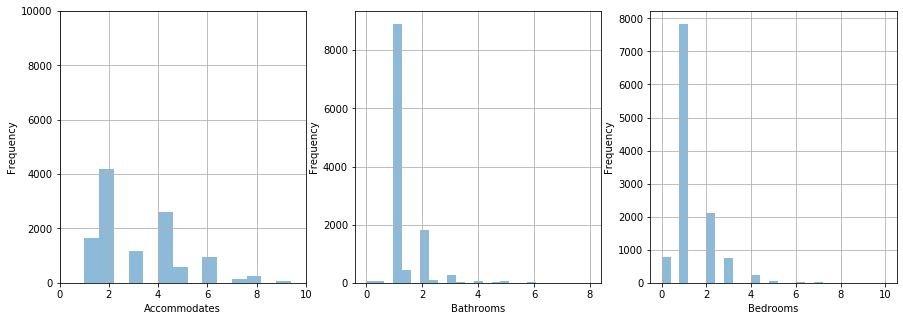

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('Accommodates')

plt.subplot(1,3,2)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.show()

In [42]:
df['Bedrooms'].value_counts()

1.0     7832
2.0     2107
0.0      791
3.0      739
4.0      235
5.0       68
6.0       25
7.0       13
8.0        8
10.0       6
Name: Bedrooms, dtype: int64

In [43]:
df['Bathrooms'].value_counts()

1.0    8904
2.0    1815
1.5     447
3.0     255
2.5     100
0.5      60
5.0      54
4.0      53
0.0      53
6.0      26
4.5      23
3.5      18
5.5       6
7.0       3
6.5       3
8.0       3
7.5       1
Name: Bathrooms, dtype: int64

Filtro a 4 Bedrooms y Bathrooms

In [44]:
df_filtered = df[df['Bedrooms'] <= 4]
df_filtered = df[df['Bathrooms'] <= 4]

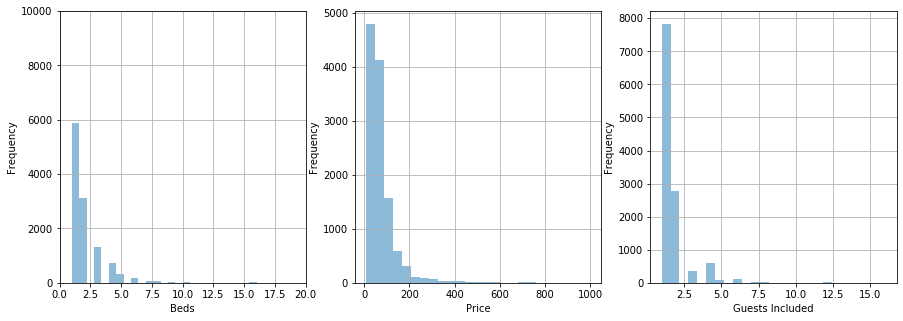

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 20, 0, 10000])
plt.xlabel('Beds')

plt.subplot(1,3,2)
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.subplot(1,3,3)
df['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

plt.show()

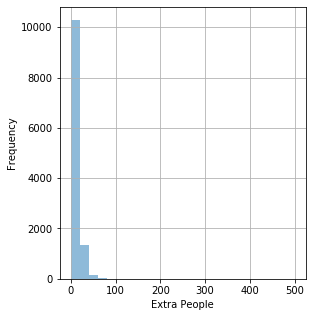

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Extra People'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 40, 0, 11824])
plt.xlabel('Extra People')

plt.show()

In [47]:
df['Beds'].value_counts()

1.0     5877
2.0     3127
3.0     1318
4.0      743
5.0      310
6.0      189
8.0       76
7.0       71
10.0      36
9.0       29
16.0      15
11.0      10
12.0       9
14.0       6
15.0       4
13.0       4
Name: Beds, dtype: int64

In [48]:
df['Guests Included'].value_counts()

1     7828
2     2767
4      584
3      360
6      111
5       83
8       32
7       24
12      10
10       9
9        6
15       4
16       4
14       2
Name: Guests Included, dtype: int64

In [49]:
df['Price'].value_counts()

50.0     541
60.0     466
25.0     432
30.0     424
35.0     393
        ... 
173.0      1
365.0      1
431.0      1
516.0      1
762.0      1
Name: Price, Length: 349, dtype: int64

In [50]:
df['Extra People'].value_counts()

0      6092
10     1623
15     1170
20      737
5       461
       ... 
500       1
38        1
94        1
47        1
4         1
Name: Extra People, Length: 67, dtype: int64

Filtro también Beds, Guests Included, Price y Extra People

In [51]:
df_filtered = df[df['Beds'] <= 10]
df_filtered = df[df['Guests Included'] <= 6]
df_filtered = df[df['Extra People'] <= 20]
df_filtered = df[df['Price'] <= 350]

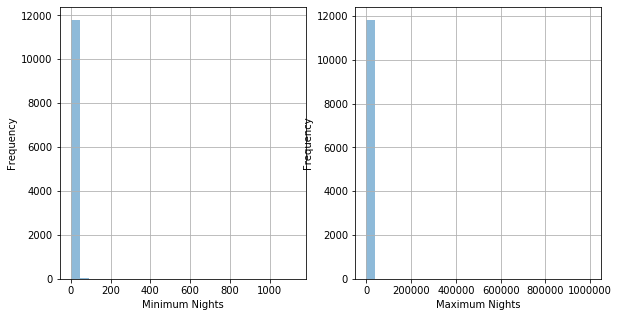

In [52]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 100, 0, 12000])
plt.xlabel('Minimum Nights')

plt.subplot(1,3,2)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 50000, 0, 12000])
plt.xlabel('Maximum Nights')

#plt.subplot(1,3,3)
#df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.xlabel('Bedrooms')

plt.show()

In [53]:
df['Minimum Nights'].value_counts()

1       4036
2       4010
3       1930
4        506
5        498
7        352
10       127
6         91
30        70
15        59
14        29
20        27
12        11
90        10
60        10
28         9
8          7
9          6
21         5
13         3
120        3
26         3
19         2
32         2
365        2
25         2
17         2
16         1
40         1
360        1
1125       1
91         1
27         1
29         1
50         1
170        1
11         1
180        1
89         1
Name: Minimum Nights, dtype: int64

In [54]:
df['Maximum Nights'].value_counts()

1125    8346
30       501
365      398
15       225
7        224
        ... 
68         1
193        1
185        1
145        1
1999       1
Name: Maximum Nights, Length: 152, dtype: int64

Minimum Nights lo dejo a 40 y Maximum Nights no lo toco

In [55]:
df_filtered = df[df['Minimum Nights'] <= 40]

Compruebo que no he quitado muchas filas

In [56]:
print(df.shape)
print(df_filtered.shape)

(11824, 22)
(11792, 22)


Así que los filtro en mi DataSet original

In [57]:
df = df[df['Bedrooms'] <= 4]
df = df[df['Bathrooms'] <= 4]
df = df[df['Beds'] <= 10]
df = df[df['Guests Included'] <= 6]
df = df[df['Price'] <= 350]
df = df[df['Extra People'] <= 20]
df = df[df['Minimum Nights'] <= 40]

Miro correlación

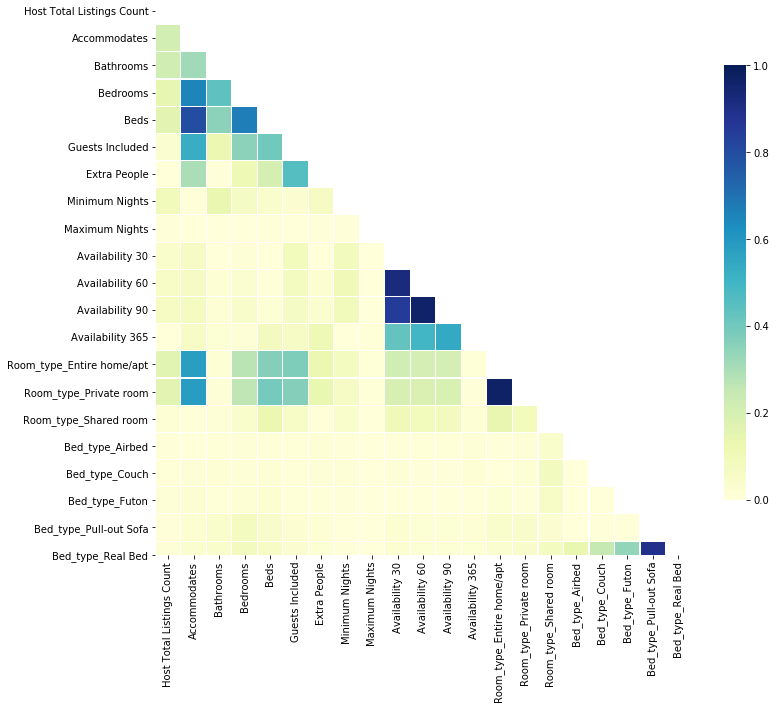

In [58]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Elimino Availability 30 y 60, y Room_type_Entire home/apt al tener alta correlación

In [59]:
df.drop(['Availability 30','Availability 60','Room_type_Entire home/apt'], axis=1, inplace=True)

Represento variable unas contra otras y veo que no hay correlación

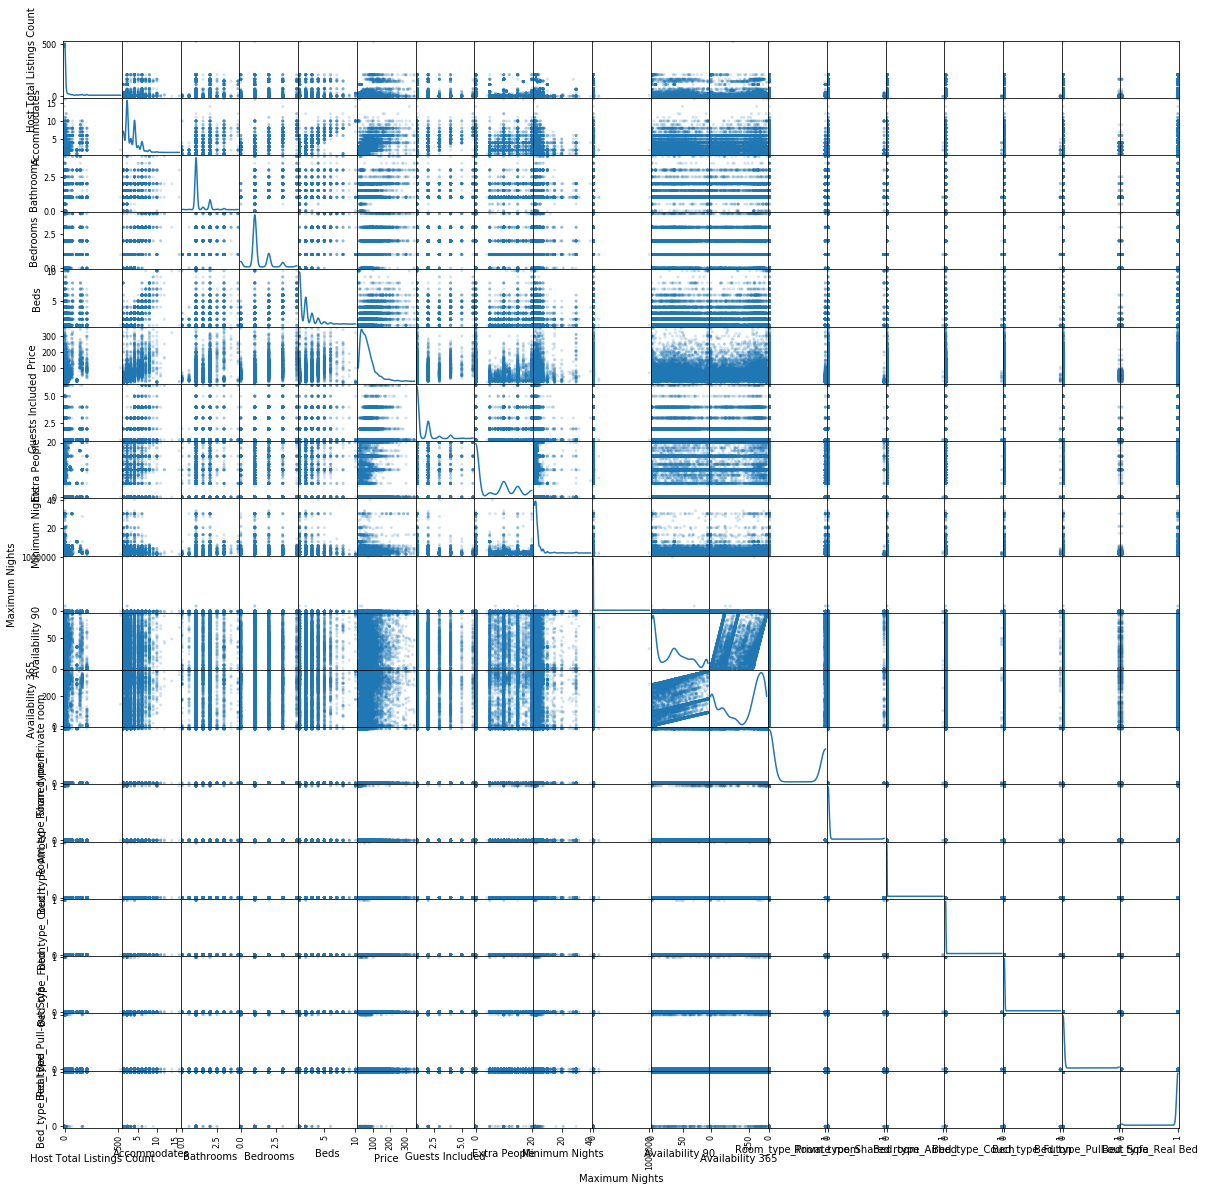

In [60]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Coloco la columna de price en la primera columna

In [61]:
def order_columns(dataframe):
    columns = []
    for column in dataframe.columns:
        if column == "Price":
            columns.insert(0, column)
        else:
            columns.append(column)
    dataframe = dataframe[columns]
    return dataframe

df = order_columns(df)
df.head()

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Room_type_Private room,Room_type_Shared room,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,22.0,1.0,2,1.0,1.0,1.0,1,8,2,1125,4,4,1,0,0,0,0,0,1
1,45.0,1.0,2,1.5,1.0,1.0,1,10,1,15,20,295,1,0,0,0,0,0,1
2,179.0,207.0,8,2.0,3.0,6.0,4,12,2,1125,49,196,0,0,0,0,0,0,1
4,25.0,1.0,1,1.0,1.0,1.0,1,0,1,4,71,346,1,0,0,0,0,0,1
5,42.0,4.0,2,1.0,1.0,1.0,1,0,1,1125,31,161,1,0,0,0,0,0,1


Divido en X_train e y_train

In [62]:
from sklearn import preprocessing
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Entreno con arbol de decisiones

best mean cross-validation score: 0.546
best parameters: {'max_depth': 5}


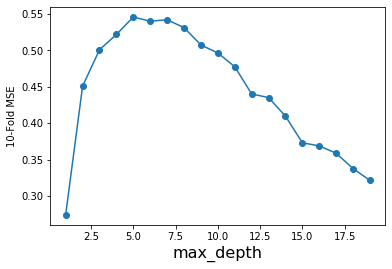

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Tu código aquí
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

# Parte de test

Cargo datos de test

In [64]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Aplico las transformaciones que he hecho en train 
(drop de columnas, filtros, generaciones, fill...):

In [65]:
df_test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
        'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
        'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location', 
        'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 
        'Country Code', 'Country', 'Features', 'Host Acceptance Rate', 'Neighbourhood', 'Has Availability',
        'License', 'Jurisdiction Names', 'Square Feet', 'Experiences Offered', 'Host Since', 'Host Response Time', 
        'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City','State', 'Zipcode','Market',
        'Longitude','Number of Reviews','First Review','Review Scores Value','Reviews per Month', 
        'Host Response Rate', 'Host Listings Count', 'Smart Location', 'Latitude', 'Calendar Updated',
        'Calendar last Scraped', 'Last Review', 'Review Scores Rating', 'Review Scores Cleanliness',
        'Review Scores Accuracy','Review Scores Checkin','Review Scores Communication','Review Scores Location',
        'Calculated host listings count','Geolocation', 'Property Type', 'Cancellation Policy', 'Amenities', 
        'Weekly Price','Monthly Price','Security Deposit','Cleaning Fee', 'Availability 30',
        'Availability 60'], axis=1, inplace=True)

df_test_prueba = df_test

df_test_prueba = pd.get_dummies(df_test_prueba['Room Type'], prefix = 'Room_type')

df_test = pd.concat([df_test,df_test_prueba],axis=1).drop(['Room Type'],axis=1)

df_test.drop(['Room_type_Entire home/apt'], axis=1, inplace=True)

df_test_prueba = df_test

df_test_prueba = pd.get_dummies(df_test_prueba['Bed Type'], prefix = 'Bed_type')

df_test = pd.concat([df_test,df_test_prueba],axis=1).drop(['Bed Type'],axis=1)

df_test.fillna(method="ffill",inplace=True)

df_test = df_test[df_test['Bedrooms'] <= 4]
df_test = df_test[df_test['Bathrooms'] <= 4]
df_test = df_test[df_test['Beds'] <= 10]
df_test = df_test[df_test['Guests Included'] <= 6]
df_test = df_test[df_test['Price'] <= 350]
df_test = df_test[df_test['Extra People'] <= 20]
df_test = df_test[df_test['Minimum Nights'] <= 40]

df_test = order_columns(df_test)

# Para incluir columnas a train que no tenga test
rellena = list(df)
rellena2 = list(df_test)
numero = 0

for i in rellena:
    if i in rellena2:
        numero += 1
    else:
        df_test[i] = 0
        cols = df_test.columns.tolist()
        cols.insert(numero, cols.pop(cols.index(i)))
        df_test = df_test[cols]
        numero +=1

Divido entre y_test y x_test

In [66]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [67]:
df.head(2)

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Room_type_Private room,Room_type_Shared room,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,22.0,1.0,2,1.0,1.0,1.0,1,8,2,1125,4,4,1,0,0,0,0,0,1
1,45.0,1.0,2,1.5,1.0,1.0,1,10,1,15,20,295,1,0,0,0,0,0,1


In [68]:
df_test.head(2)

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Room_type_Private room,Room_type_Shared room,Bed_type_Airbed,Bed_type_Couch,Bed_type_Futon,Bed_type_Pull-out Sofa,Bed_type_Real Bed
0,45.0,2.0,2,1.0,1.0,1.0,1,0,1,1125,40,315,0,0,0,0,0,0,1
1,20.0,1.0,2,1.0,1.0,1.0,1,0,2,10,62,62,1,0,0,0,0,0,1


Muestro resultados con test

In [69]:
from sklearn.metrics import mean_squared_error 
import math

max_depth_optimo = grid.best_params_['max_depth']#*10 #*100
Tree = DecisionTreeRegressor(max_depth = max_depth_optimo).fit(XtrainScaled,y_train)

ytrainTree = Tree.predict(XtrainScaled)
ytestTree= Tree.predict(XtestScaled)
mseTrainModelTree = mean_squared_error(y_train,ytrainTree)
mseTestModelTree = mean_squared_error(y_test,ytestTree)

print('MSE Modelo Decision Tree Regressor (train): %0.5g' % mseTrainModelTree)
print('MSE Modelo Decision Tree Regressor (test) : %0.5g' % mseTestModelTree)

#w = Tree.tree_
#for f,wi in zip(feature_names,w):
#    print(f,wi)
print()
print(f'{math.sqrt(mseTrainModelTree)} % de error en Train'.format() )
print(f'{math.sqrt(mseTestModelTree)} % de error en Test'.format() )

MSE Modelo Decision Tree Regressor (train): 908.31
MSE Modelo Decision Tree Regressor (test) : 876.97

30.138238101145912 % de error en Train
29.613722013506703 % de error en Test


Llego a la conclusión que he realizado mal el cribado de columnas al tener un resultado bastante alto

A continuación pinto gráfica con importancia de características a partir del resultado anterior

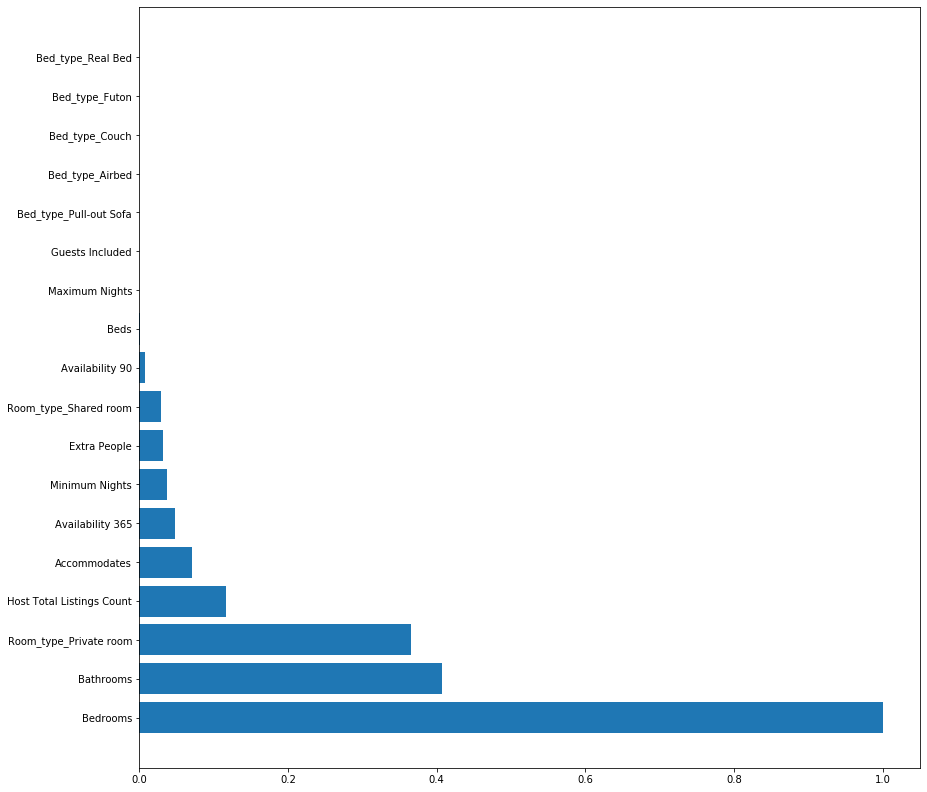

In [70]:
importances = grid.best_estimator_.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Compruebo realmente que la mitad de las características con las que me quedé no tienen importancia, con lo que debería seleccionar otras características.

A continuación entreno train con otros métodos en los que veo que me da más o menos el mismo resultado

Entreno con SVM con método Kernel

In [71]:
from sklearn.svm import SVR

vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [72]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.588
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}


In [74]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acc (TEST): 0.61


Selecciono variable óptima por métodos Lasso y Ridge

best mean cross-validation score: -1054.919
best parameters: {'alpha': 0.06158482110660261}


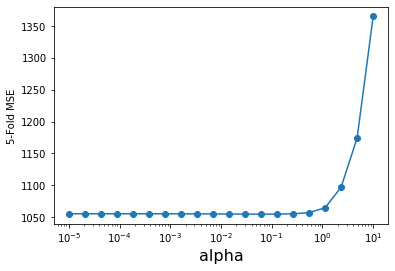

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

alpha_vector = np.logspace(-5,1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1049.5
MSE Modelo Lasso (test) : 989.52
Host Total Listings Count 6.044747428798032
Accommodates 10.738676923764201
Bathrooms 7.496510484949468
Bedrooms 8.662115751000806
Beds -0.4016866427793794
Guests Included 0.0
Extra People -4.917530910034104
Minimum Nights 2.267542211466249
Maximum Nights 0.0
Availability 90 3.5781273772315383
Availability 365 -0.0
Room_type_Private room -16.35314882105177
Room_type_Shared room -5.016256042767135
Bed_type_Airbed -0.0536800580176384
Bed_type_Couch -0.047778305374402925
Bed_type_Futon -0.0
Bed_type_Pull-out Sofa -0.0
Bed_type_Real Bed 0.4603186043721014


best mean cross-validation score: -1055.256
best parameters: {'alpha': 143.8449888287663}


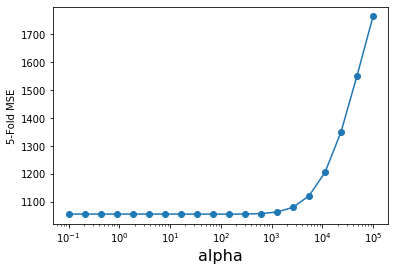

In [77]:
alpha_vector = np.logspace(-1,5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [78]:
alpha_optimo = grid.best_params_['alpha']#*10 #*100
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.5g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.5g' % mseTestModelRidge)

w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Ridge (train): 1049.5
MSE Modelo Ridge (test) : 989.72
Host Total Listings Count [ 6.05908485e+00  1.07589655e+01  7.44633404e+00  8.62633962e+00
 -3.96009750e-01  8.49730501e-02 -4.92011688e+00  2.32304787e+00
  3.92027761e-03  3.60513427e+00 -7.98763024e-02 -1.61626426e+01
 -4.98103371e+00 -1.38901129e-01 -1.55701212e-01 -7.07087839e-02
 -2.05848739e-01  2.67695750e-01]


In [79]:
# Boosted trees

from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

best mean cross-validation score: 0.622
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


D:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


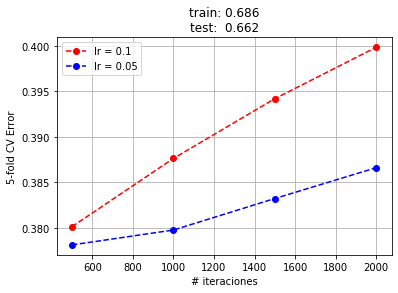

In [80]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()